# Merito e Sorte


In [2]:
import tabula
import pandas as pd

In [7]:
dados = tabula.read_pdf("/home/renata/Desktop/Cursos/projetos/Meritocracia/inscritos_2020.pdf",
                        pages = "all")
len(dados)

2

In [9]:
dados[0].head()

,CODIGO,NOME,VAGAS,INSCRITOS,C/V,VAGAS AC,INSCRITOS AC,C/V AC,VAGAS EP,INSCRITOS EP,C/V EP,VAGAS PPI,INSCRITOS PPI,C/V PPI
0,100,"Administração, Ciências Contábeis, Economia, E...",187,1562,"8,35",93,1165,"12,53",59,312,"5,29",35,85,"2,43"
1,101,Administração - Piracicaba,40,283,"7,08",22,196,"8,91",11,70,"6,36",7,17,"2,43"
2,105,Arquitetura - FAU,105,2724,"25,94",67,1924,"28,72",27,599,"22,19",11,201,"18,27"
3,110,Arquitetura - São Carlos,31,622,"20,06",15,408,"27,2",10,178,"17,8",6,36,6
4,115,Artes Cênicas,30,667,"22,23",16,411,"25,69",8,185,"23,13",6,71,"11,83"


In [11]:
dados[1].head()

,500,Medicina,122,15794,"129,46",67,11031,"164,64",33,3484,"105,58",22,1279,"58,14"
0,501.0,Medicina - Bauru,42,5217,"124,21",26,3952,152,8,887,"110,88",8,378,"47,25"
1,505.0,Medicina - Ribeirão Preto,77,6856,"89,04",55,5183,"94,24",18,1418,"78,78",4,255,"63,75"
2,510.0,Medicina Veterinária,56,2403,"42,91",38,1607,"42,29",11,615,"55,91",7,181,"25,86"
3,515.0,Medicina Veterinária - Pirassununga,42,906,"21,57",24,624,26,10,224,"22,4",8,58,"7,25"
4,520.0,Nutrição,56,854,"15,25",40,600,15,12,203,"16,92",4,51,"12,75"


Os dados são duas páginas de uma mesma tabela, quando faz a leitura da segunda página (conforme feito acima) o tabula entende que a primeira linha é o cabeçalho e isso precisa ser modificado, pois caso não seja irá perder dados. O mesmo acontece, nesse caso, para as últimas linhas, já que elas possuem os totais.

In [13]:
#Ver últimas linhas
dados[1].tail()

,500,Medicina,122,15794,"129,46",67,11031,"164,64",33,3484,"105,58",22,1279,"58,14"
47,870.0,Química (Bacharelado e Bacharelado com Atribui...,e Qua4li2d,de e Ma1te7r3i,"is) -4 S,1ã2o",Carlos23,112,"4,87",11,52,"4,73",8,9,"1,13"
48,875.0,Sistemas de Informação - São Carlos,35,342,"9,77",19,217,"11,42",10,104,"10,4",6,21,"3,5"
49,999.0,Treinamento E (Exatas),300,3530,"11,77",180,3177,"17,65",75,308,"4,11",45,45,1
50,NaN,Total das Carreiras,9217,129148,"14,01",5964,94888,"15,91",2082,26368,"12,66",1171,7892,"6,74"
51,NaN,Total das Carreiras sem Treineiros,8317,117019,"14,07",5424,83841,"15,46",1857,25450,"13,7",1036,7728,"7,46"


In [14]:
#Retirando as duas últimas linhas
dados[1] = dados[1].iloc[:-2]
dados[1].tail()

,500,Medicina,122,15794,"129,46",67,11031,"164,64",33,3484,"105,58",22,1279,"58,14"
45,855.0,Química - Bacharelado e Licenciatura,84,752,"8,95",50,462,"9,24",20,220,11,14,70,5
46,865.0,Química - Licenciatura - Ribeirão Preto,28,61,"2,18",15,46,"3,07",8,10,"1,25",5,5,1
47,870.0,Química (Bacharelado e Bacharelado com Atribui...,e Qua4li2d,de e Ma1te7r3i,"is) -4 S,1ã2o",Carlos23,112,"4,87",11,52,"4,73",8,9,"1,13"
48,875.0,Sistemas de Informação - São Carlos,35,342,"9,77",19,217,"11,42",10,104,"10,4",6,21,"3,5"
49,999.0,Treinamento E (Exatas),300,3530,"11,77",180,3177,"17,65",75,308,"4,11",45,45,1


In [15]:
#Colocando o cabeçalho correto
dados_columns = dados[0].columns
linha_extra = dados[1].columns
dados[1].columns = dados_columns
dados[1].head()

,CODIGO,NOME,VAGAS,INSCRITOS,C/V,VAGAS AC,INSCRITOS AC,C/V AC,VAGAS EP,INSCRITOS EP,C/V EP,VAGAS PPI,INSCRITOS PPI,C/V PPI
0,501.0,Medicina - Bauru,42,5217,"124,21",26,3952,152,8,887,"110,88",8,378,"47,25"
1,505.0,Medicina - Ribeirão Preto,77,6856,"89,04",55,5183,"94,24",18,1418,"78,78",4,255,"63,75"
2,510.0,Medicina Veterinária,56,2403,"42,91",38,1607,"42,29",11,615,"55,91",7,181,"25,86"
3,515.0,Medicina Veterinária - Pirassununga,42,906,"21,57",24,624,26,10,224,"22,4",8,58,"7,25"
4,520.0,Nutrição,56,854,"15,25",40,600,15,12,203,"16,92",4,51,"12,75"


Percebe-se que a leitura dos dados da segunda página agora contém o cabeçalho correto, porém foi perdido uma linha, a linha do apêndice. Tem que colocar ela também, para que não haja nenhuma perda de informação.

In [16]:
dados.append(pd.DataFrame([linha_extra], columns=dados_columns))
dados[2].head()

,CODIGO,NOME,VAGAS,INSCRITOS,C/V,VAGAS AC,INSCRITOS AC,C/V AC,VAGAS EP,INSCRITOS EP,C/V EP,VAGAS PPI,INSCRITOS PPI,C/V PPI
0,500,Medicina,122,15794,"129,46",67,11031,"164,64",33,3484,"105,58",22,1279,"58,14"


Agora foi adicionado uma "terceira página" para resolver o problema da retirada da linha de medicina.

In [17]:
dados = pd.concat(dados)
dados.head()

,CODIGO,NOME,VAGAS,INSCRITOS,C/V,VAGAS AC,INSCRITOS AC,C/V AC,VAGAS EP,INSCRITOS EP,C/V EP,VAGAS PPI,INSCRITOS PPI,C/V PPI
0,100,"Administração, Ciências Contábeis, Economia, E...",187,1562,"8,35",93,1165,"12,53",59,312,"5,29",35,85,"2,43"
1,101,Administração - Piracicaba,40,283,"7,08",22,196,"8,91",11,70,"6,36",7,17,"2,43"
2,105,Arquitetura - FAU,105,2724,"25,94",67,1924,"28,72",27,599,"22,19",11,201,"18,27"
3,110,Arquitetura - São Carlos,31,622,"20,06",15,408,"27,2",10,178,"17,8",6,36,6
4,115,Artes Cênicas,30,667,"22,23",16,411,"25,69",8,185,"23,13",6,71,"11,83"


Utilizando a função "concat" da biblioteca pandas todas as partes das tabelas do arquivo em PDF foi colocado em apenas uma tabela.

In [18]:
len(dados)

109

Antes o tamanho do conjunto "dados" era mostrado apenas o tamanho 2, que era o número de páginas. Após adicionar todas as partes da tabela em uma só o tamanho mostrado é de quantos cursos possui, que nesse caso são 109 cursos. 

In [19]:
dados = dados[["NOME", "VAGAS", "INSCRITOS", "C/V"]]
dados.head()

,NOME,VAGAS,INSCRITOS,C/V
0,"Administração, Ciências Contábeis, Economia, E...",187,1562,"8,35"
1,Administração - Piracicaba,40,283,"7,08"
2,Arquitetura - FAU,105,2724,"25,94"
3,Arquitetura - São Carlos,31,622,"20,06"
4,Artes Cênicas,30,667,"22,23"


Extrai apenas as colunas que são necessárias para avaliar se o fator sorte faz diferença ou não no vestibular da USP.

A colunca "C/V" é a coluna de candidatos por vaga.

In [20]:
dados.describe()

,NOME,VAGAS,INSCRITOS,C/V
count,109,109,109,109
unique,109,60,106,104
top,Treinamento B (Biológicas),28,730,"5,27"
freq,1,9,2,2


In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NOME       109 non-null    object
 1   VAGAS      109 non-null    object
 2   INSCRITOS  109 non-null    object
 3   C/V        109 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


Ao analisar a saída das duas funções utilizadas percebe-se que tem algo errado porque as colunas vagas, inscritos e candidatos/vaga deveria ser numérica e está aparecendo como se ela fosse uma coluna de textos. 

Ao perceber essa estranheza e voltar nos dados percebe-se que alguma coluna teve erro ao fazer a leitura, os dados foram muito para frente em determinada linha.

In [22]:
dados.tail()

,NOME,VAGAS,INSCRITOS,C/V
46,Química - Licenciatura - Ribeirão Preto,28,61,"2,18"
47,Química (Bacharelado e Bacharelado com Atribui...,e Qua4li2d,de e Ma1te7r3i,"is) -4 S,1ã2o"
48,Sistemas de Informação - São Carlos,35,342,"9,77"
49,Treinamento E (Exatas),300,3530,"11,77"
0,Medicina,122,15794,"129,46"


A linha 47 está fazendo com que os dados sejam lidos como texto, já que houve erro. Como o interesse não é ler linha por linha, ela será retirada.

In [24]:
dados = dados.drop(47)

In [25]:
dados.describe()

,NOME,VAGAS,INSCRITOS,C/V
count,107,107,107,107
unique,107,58,104,102
top,Treinamento B (Biológicas),28,163,"5,27"
freq,1,9,2,2


Percebe-se que ainda não está lendo como se fosse número, então tem que fazer a conversão deles da dados numéricos.

In [27]:
pd.to_numeric(dados['INSCRITOS'])

ValueError: Unable to parse string "nológica3,5 B2i" at position 101

Devido ao erro gerado descobre-se que ainda há "lixos" que são dados que foram lido de forma errada, para consertar isso basta acrescentar outro parâmetro na função "to_numeric". 

O "coerce" vai converter tudo que não for númerico em NaN (not a number).

In [32]:
dados['candidatos'] = pd.to_numeric(dados['INSCRITOS'], errors = 'coerce').astype(int)
dados['vagas'] = pd.to_numeric(dados['VAGAS'], errors = 'coerce').astype(int)
dados['candidatos_por_vaga'] = dados['candidatos'] / dados['vagas']
dados['nome'] = dados['NOME']
dados = dados.dropna()
dados.describe()

,candidatos,vagas,candidatos_por_vaga
count,105.000000,105.000000,105.000000
mean,1193.066667,81.771429,15.273537
std,2181.669426,115.123534,21.092466
min,45.000000,12.000000,1.607143
25%,163.000000,28.000000,5.000000
50%,483.000000,42.000000,8.352941
75%,1092.000000,84.000000,15.116667
max,15794.000000,783.000000,129.459016


In [33]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 0
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME                 105 non-null    object 
 1   VAGAS                105 non-null    object 
 2   INSCRITOS            105 non-null    object 
 3   C/V                  105 non-null    object 
 4   candidatos           105 non-null    int64  
 5   vagas                105 non-null    int64  
 6   candidatos_por_vaga  105 non-null    float64
 7   nome                 105 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.4+ KB


In [38]:
dados = dados[['nome', 'vagas', 'candidatos', 'candidatos_por_vaga']]
dados.sort_values("candidatos_por_vaga", ascending = False)
dados.head(30)

,nome,vagas,candidatos,candidatos_por_vaga
0,"Administração, Ciências Contábeis, Economia, E...",187,1562,8.352941
1,Administração - Piracicaba,40,283,7.075000
2,Arquitetura - FAU,105,2724,25.942857
3,Arquitetura - São Carlos,31,622,20.064516
4,Artes Cênicas,30,667,22.233333
5,Artes Visuais,30,797,26.566667
6,Biblioteconomia,28,104,3.714286
7,Biblioteconomia e Ciência da Informação - Ribe...,28,52,1.857143
8,Ciências Sociais,147,1136,7.727891
9,Curso Superior do Audiovisual,24,1126,46.916667


In [41]:
curso = 'Medicina'
linha_medicina = dados.query("nome == @curso").iloc[0]
vagas = linha_medicina['vagas']
candidatos = linha_medicina['candidatos']
vagas, candidatos

(122, 15794)

Agora que foi pego a quantidade de vagas e de candidatos do curso de medicina é desejado que se pegue mais candidatos e que essa quantidade de candidatos seja igual a que já tem.

In [44]:
import numpy as np

def gera(media, desvio_padrao, candidatos):
    return np.random.normal(media, desvio_padrao, candidatos)

proprio_esforco = gera(70, 10, candidatos)
proprio_esforco

array([77.65460122, 73.4228602 , 71.3465955 , ..., 72.15289537,
       66.13818928, 71.07412653])

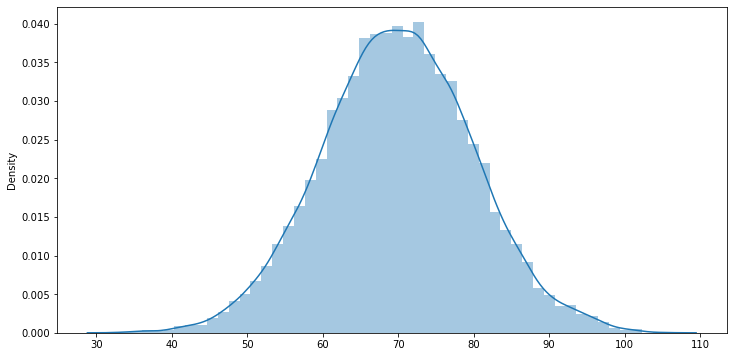

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.distplot(proprio_esforco)
plt.show()

In [46]:
def gera_sorte(candidatos):
    return np.random.uniform(0, 100, candidatos)

sorte = gera_sorte(candidatos)
sorte

array([28.17262831, 52.7957292 , 49.1648963 , ..., 88.28792606,
       63.35269823, 82.80769939])

Nesse caso está se considerando que a sorte afeta a todos de forma igual, o que sabemos que não é verdade já que a própria desigualdade influencia na sorte também.

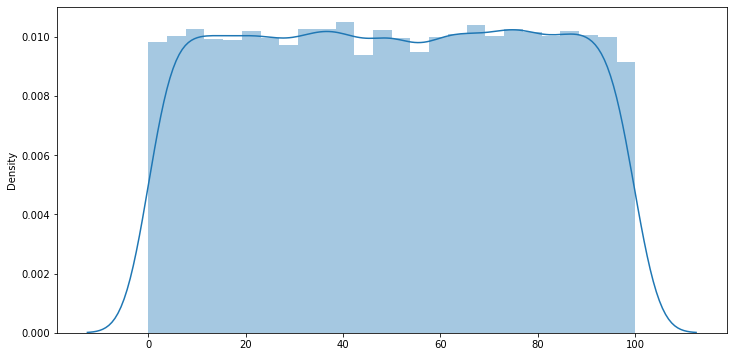

In [47]:
plt.figure(figsize=(12,6))
sns.distplot(sorte)
plt.show()

In [50]:
dados_gerais = np.array([proprio_esforco, sorte]).T
candidatos_gerais = pd.DataFrame(dados_gerais, columns=['proprio_esforco', 'sorte'])
canditados_gerais = candidatos_gerais.sort_values("proprio_esforco", ascending = False)
candidatos_gerais.head(vagas)

,proprio_esforco,sorte
0,77.654601,28.172628
1,73.422860,52.795729
2,71.346595,49.164896
3,59.424170,94.254343
4,73.923563,25.036178
...,...,...
117,66.996326,11.971479
118,80.141764,51.553530
119,63.220610,81.847739
120,77.479915,82.232363
